<a href="https://colab.research.google.com/github/rania-guefaifia872/Projet-2CP/blob/main/Copie_de_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
!kaggle datasets download -d vishesh1412/celebrity-face-image-dataset
!unzip celebrity-face-image-dataset.zip -d /content/

Dataset URL: https://www.kaggle.com/datasets/vishesh1412/celebrity-face-image-dataset
License(s): CC0-1.0
celebrity-face-image-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  celebrity-face-image-dataset.zip
replace /content/Celebrity Faces Dataset/Angelina Jolie/001_fe3347c0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: /content/Celebrity Faces Dataset/Angelina Jolie/001_fe3347c0.jpg  
  inflating: /content/Celebrity Faces Dataset/Angelina Jolie/002_8f8da10e.jpg  
  inflating: /content/Celebrity Faces Dataset/Angelina Jolie/003_57612506.jpg  
  inflating: /content/Celebrity Faces Dataset/Angelina Jolie/004_f61e7d0c.jpg  
  inflating: /content/Celebrity Faces Dataset/Angelina Jolie/005_582c121a.jpg  
  inflating: /content/Celebrity Faces Dataset/Angelina Jolie/006_9135205d.jpg  
  inflating: /content/Celebrity Faces Dataset/Angelina Jolie/007_cabbfcbb.jpg  
  inflating: /content/Celebrity Faces Dataset/Angelina Jolie/

In [32]:
!pip install mtcnn

In [33]:
import cv2 as cv
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [34]:
from mtcnn.mtcnn import MTCNN



# Automate the preprocessing


In [35]:
# class FACELOADING:
#     def __init__(self, directory):
#         self.directory = directory
#         self.target_size = (160,160)
#         self.X = []
#         self.Y = []
#         self.detector = MTCNN()


#     def extract_face(self, filename):
#         img = cv.imread(filename)
#         img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
#         x,y,w,h = self.detector.detect_faces(img)[0]['box']
#         x,y = abs(x), abs(y)
#         face = img[y:y+h, x:x+w]
#         face_arr = cv.resize(face, self.target_size)
#         return face_arr


#     def load_faces(self, dir):
#         FACES = []
#         for im_name in os.listdir(dir):
#             try:
#                 path = dir + im_name
#                 single_face = self.extract_face(path)
#                 FACES.append(single_face)
#             except Exception as e:
#                 pass
#         return FACES

#     def load_classes(self):
#         for sub_dir in os.listdir(self.directory):
#             path = self.directory +'/'+ sub_dir+'/'
#             FACES = self.load_faces(path)
#             labels = [sub_dir for _ in range(len(FACES))]
#             print(f"Loaded successfully: {len(labels)}")
#             self.X.extend(FACES)
#             self.Y.extend(labels)

#         return np.asarray(self.X), np.asarray(self.Y)


#     def plot_images(self):
#         plt.figure(figsize=(18,16))
#         for num,image in enumerate(self.X):
#             ncols = 3
#             nrows = len(self.Y)//ncols + 1
#             plt.subplot(nrows,ncols,num+1)
#             plt.imshow(image)
#             plt.axis('off')

In [36]:
import json

class FACELOADING:
    def __init__(self, directory):
        self.directory = directory
        self.target_size = (160, 160)
        self.X = []
        self.Y = []
        self.detector = MTCNN()
        self.label_map = {}  # Add a label_map to store class-to-index mapping

    def extract_face(self, filename):
        img = cv.imread(filename)
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        x, y, w, h = self.detector.detect_faces(img)[0]['box']
        x, y = abs(x), abs(y)
        face = img[y:y + h, x:x + w]
        face_arr = cv.resize(face, self.target_size)
        return face_arr

    def load_faces(self, dir):
        FACES = []
        for im_name in os.listdir(dir):
            try:
                path = dir + im_name
                single_face = self.extract_face(path)
                FACES.append(single_face)
            except Exception as e:
                pass
        return FACES

    def load_classes(self):
        label_idx = 0
        for sub_dir in os.listdir(self.directory):
            path = self.directory + '/' + sub_dir + '/'
            FACES = self.load_faces(path)
            labels = [sub_dir for _ in range(len(FACES))]
            print(f"Loaded successfully: {len(labels)}")
            self.X.extend(FACES)
            self.Y.extend(labels)

            # Add to label_map if the class is new
            if sub_dir not in self.label_map:
                self.label_map[sub_dir] = label_idx
                label_idx += 1

        # Save the label map
        with open("label_map.json", "w") as f:
            json.dump(self.label_map, f)

        return np.asarray(self.X), np.asarray(self.Y)


In [37]:
# plt.figure(figsize=(20,15))
# for num,image in enumerate(X):
#     ncols = 1
#     nrows = len(Y)//ncols + 1
#     plt.subplot(nrows,ncols,num+1)
#     plt.imshow(image)
#     plt.axis('off')

# FaceNet part

In [38]:
!pip install keras-facenet

In [39]:
from keras_facenet import FaceNet
embedder = FaceNet()

def get_embedding(face_img):
    face_img = face_img.astype('float32') # 3D(160x160x3)
    face_img = np.expand_dims(face_img, axis=0)
    # 4D (Nonex160x160x3)
    yhat= embedder.embeddings(face_img)
    return yhat[0] # 512D image (1x1x512)

In [40]:
EMBEDDED_X = []

for img in X:
 EMBEDDED_X.append(get_embedding(img))

EMBEDDED_X = np.asarray(EMBEDDED_X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [41]:
faceloading=FACELOADING("/content/Celebrity Faces Dataset")
X,Y = faceloading.load_classes()
print(faceloading.label_map)


Loaded successfully: 100
Loaded successfully: 100
Loaded successfully: 100
Loaded successfully: 100
Loaded successfully: 100
Loaded successfully: 100
Loaded successfully: 100
Loaded successfully: 99
Loaded successfully: 98
Loaded successfully: 100
Loaded successfully: 100
Loaded successfully: 100
Loaded successfully: 100
Loaded successfully: 99
Loaded successfully: 198
Loaded successfully: 100
Loaded successfully: 100
{'Leonardo DiCaprio': 0, 'Jennifer Lawrence': 1, 'Brad Pitt': 2, 'Nicole Kidman': 3, 'Sandra Bullock': 4, 'Angelina Jolie': 5, 'Natalie Portman': 6, 'Robert Downey Jr': 7, 'Tom Hanks': 8, 'Tom Cruise': 9, 'Will Smith': 10, 'Denzel Washington': 11, 'Hugh Jackman': 12, 'Kate Winslet': 13, 'Scarlett Johansson': 14, 'Johnny Depp': 15, 'Megan Fox': 16}


In [42]:
Y_encoded = [faceloading.label_map[label] for label in Y]
np.savez_compressed('faces_embeddings_done_4classes.npz', EMBEDDED_X, Y_encoded)

# SVM model


In [43]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)

Text(0, 0.5, '7')

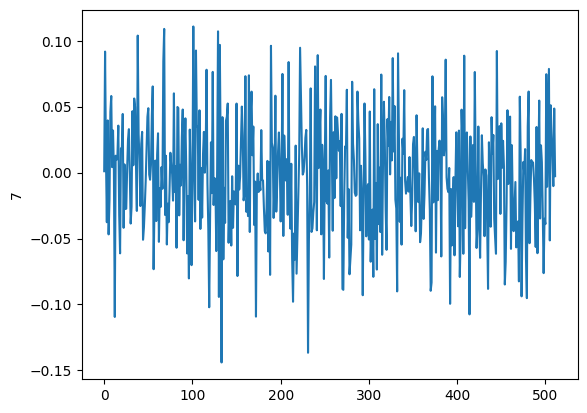

In [44]:
plt.plot(EMBEDDED_X[0])
plt.ylabel(Y[0])

In [ ]:
Y

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(EMBEDDED_X, Y, shuffle=True, random_state=17)

In [ ]:
from sklearn.svm import SVC
model = SVC(kernel='linear', probability=True)
model.fit(X_train, Y_train)

In [ ]:
ypreds_train = model.predict(X_train)
ypreds_test = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_train, ypreds_train)

In [ ]:
accuracy_score(Y_test,ypreds_test)

In [88]:
import requests
import os

# Specify the URL and the save path
url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQbrOOTQeaigJt6my7cQMkDwviTa6Ej84kntw&s"
save_path = "/content/will2.jpg"

# Download the image
response = requests.get(url, stream=True)
if response.status_code == 200:
    # Save the image to the content folder
    with open(save_path, "wb") as file:
        for chunk in response.iter_content(1024):
            file.write(chunk)
    print(f"Image downloaded and saved to {save_path}")
else:
    print("Failed to download the image.")


Image downloaded and saved to /content/will2.jpg


In [89]:
t_im = cv.imread("/content/will2.jpg")
t_im = cv.cvtColor(t_im, cv.COLOR_BGR2RGB)
x,y,w,h = faceloading.detector.detect_faces(t_im)[0]['box']


In [90]:
t_im = t_im[y:y+h, x:x+w]
t_im = cv.resize(t_im, (160,160))
test_im = get_embedding(t_im)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


In [91]:
# Load the saved label map
with open("label_map.json", "r") as f:
    label_map = json.load(f)

# Reverse the label map for index-to-label mapping
index_to_label = {idx: label for label, idx in label_map.items()}

# Perform inference
t_im = cv.imread("/content/will2.jpg")
t_im = cv.cvtColor(t_im, cv.COLOR_BGR2RGB)
x,y,w,h = faceloading.detector.detect_faces(t_im)[0]['box']

t_im = t_im[y:y + h, x:x + w]
t_im = cv.resize(t_im, (160, 160))
test_im = get_embedding(t_im)

test_im = [test_im]
ypreds = model.predict(test_im)




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


In [92]:
ypreds

array([9])

In [93]:
encoder.inverse_transform(ypreds)

array(['Natalie Portman'], dtype='<U18')

In [56]:
print(encoder.classes_)

['Angelina Jolie' 'Brad Pitt' 'Denzel Washington' 'Hugh Jackman'
 'Jennifer Lawrence' 'Johnny Depp' 'Kate Winslet' 'Leonardo DiCaprio'
 'Megan Fox' 'Natalie Portman' 'Nicole Kidman' 'Robert Downey Jr'
 'Sandra Bullock' 'Scarlett Johansson' 'Tom Cruise' 'Tom Hanks'
 'Will Smith']


In [94]:
import pickle
#save the model
with open('svm_model_160x160.pkl','wb') as f:
    pickle.dump(model,f)

<IPython.core.display.Javascript object>

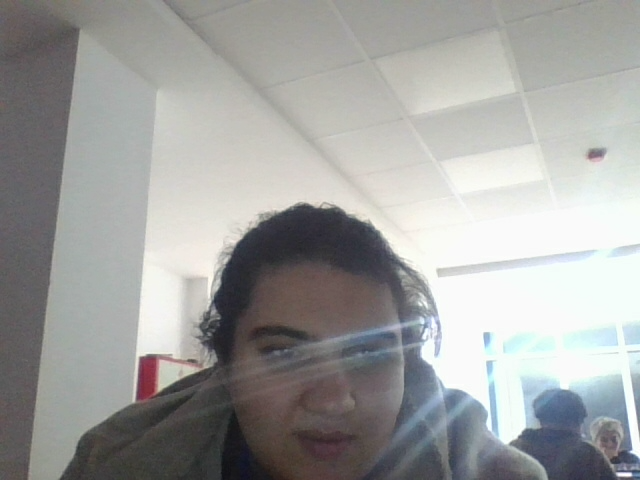

In [134]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import cv2 as cv
import numpy as np
from keras_facenet import FaceNet
import pickle
from sklearn.preprocessing import LabelEncoder
from PIL import Image
from io import BytesIO

# Load your models
facenet = FaceNet()
faces_embeddings = np.load("faces_embeddings_done_4classes.npz")
Y = faces_embeddings['arr_1']
encoder = LabelEncoder()
encoder.fit(Y)
haarcascade = cv.CascadeClassifier("haarcascade_frontalface_default.xml")
model = pickle.load(open("svm_model_160x160.pkl", 'rb'))

def capture_image():
    js = Javascript('''
    async function captureImage() {
        const video = document.createElement('video');
        video.style.display = 'block';
        document.body.appendChild(video);

        const stream = await navigator.mediaDevices.getUserMedia({ video: true });
        video.srcObject = stream;
        await video.play();

        // Capture a frame from the webcam
        const canvas = document.createElement('canvas');
        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;
        canvas.getContext('2d').drawImage(video, 0, 0);
        stream.getTracks().forEach(track => track.stop());
        video.remove();

        return canvas.toDataURL('image/png');
    }
    captureImage();
    ''')
    display(js)
    data = eval_js("captureImage()")
    return data

def process_frame(image_data):
    binary_data = b64decode(image_data.split(',')[1])
    img_array = np.array(Image.open(BytesIO(binary_data)))
    rgb_img = cv.cvtColor(img_array, cv.COLOR_RGB2BGR)
    gray_img = cv.cvtColor(rgb_img, cv.COLOR_BGR2GRAY)
    faces = haarcascade.detectMultiScale(gray_img, 1.3, 5)
    for x, y, w, h in faces:
        img = rgb_img[y:y+h, x:x+w]
        img = cv.resize(img, (160, 160))
        img = np.expand_dims(img, axis=0)
        ypred = facenet.embeddings(img)
        face_name = model.predict(ypred)
        final_name = encoder.inverse_transform(face_name)[0]
        cv.rectangle(rgb_img, (x, y), (x + w, y + h), (255, 0, 255), 2)
        cv.putText(rgb_img, str(final_name), (x, y - 10), cv.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    return rgb_img

# Capture an image from the webcam
image_data = capture_image()

# Process the frame
result = process_frame(image_data)

# Display the result
from google.colab.patches import cv2_imshow
cv2_imshow(result)


In [141]:
# face recognition part II
#IMPORT
import cv2 as cv
import numpy as np
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
import pickle
from keras_facenet import FaceNet
#INITIALIZE
facenet = FaceNet()
faces_embeddings = np.load("faces_embeddings_done_4classes.npz")
Y = faces_embeddings['arr_1']
encoder = LabelEncoder()
encoder.fit(Y)
haarcascade = cv.CascadeClassifier("haarcascade_frontalface_default.xml")
model = pickle.load(open("svm_model_160x160.pkl", 'rb'))

cap = cv.VideoCapture(1)
# WHILE LOOP

while cap.isOpened():
    _, frame = cap.read()
    rgb_img = cv.cvtColor(frame, cv.COLOR_BGR2RGB)
    gray_img = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    faces = haarcascade.detectMultiScale(gray_img, 1.3, 5)
    for x,y,w,h in faces:
        img = rgb_img[y:y+h, x:x+w]
        img = cv.resize(img, (160,160)) # 1x160x160x3
        img = np.expand_dims(img,axis=0)
        ypred = facenet.embeddings(img)
        face_name = model.predict(ypred)
        final_name = encoder.inverse_transform(face_name)[0]
        cv.rectangle(frame, (x,y), (x+w,y+h), (255,0,255), 10)
        cv.putText(frame, str(final_name), (x,y-10), cv.FONT_HERSHEY_SIMPLEX,
                   1, (0,0,255), 3, cv.LINE_AA)

    cv.imshow("Face Recognition:", frame)
    if cv.waitKey(1) & ord('q') ==27:
        break

cap.release()
cv.destroyAllWindows

Haar Cascade loaded successfully.


ERROR: Could not find a version that satisfies the requirement opencv-data (from versions: none)
ERROR: No matching distribution found for opencv-data


In [132]:
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml


--2024-12-21 23:38:41--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.02s   

2024-12-21 23:38:41 (42.1 MB/s) - ‘haarcascade_frontalface_default.xml’ saved [930127/930127]



In [133]:
haarcascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')


In [111]:
import cv2 as cv
cap = cv.VideoCapture(1)
if not cap.isOpened():
    print("Error: Camera not accessible.")
else:
    print("Camera is accessible.")

Error: Camera not accessible.


In [115]:
import cv2 as cv
import os

def check_video_devices():
    for i in range(5):  # Test multiple indices
        cap = cv.VideoCapture(i)
        if cap.isOpened():
            print(f"Camera index {i} is accessible!")
            cap.release()
        else:
            print(f"Camera index {i} is not accessible.")

if __name__ == "__main__":
    print("Checking system devices...")
    check_video_devices()




Checking system devices...
Camera index 0 is not accessible.
Camera index 1 is not accessible.
Camera index 2 is not accessible.
Camera index 3 is not accessible.
Camera index 4 is not accessible.


In [116]:
!pip install opencv-python-headless


<IPython.core.display.Javascript object>

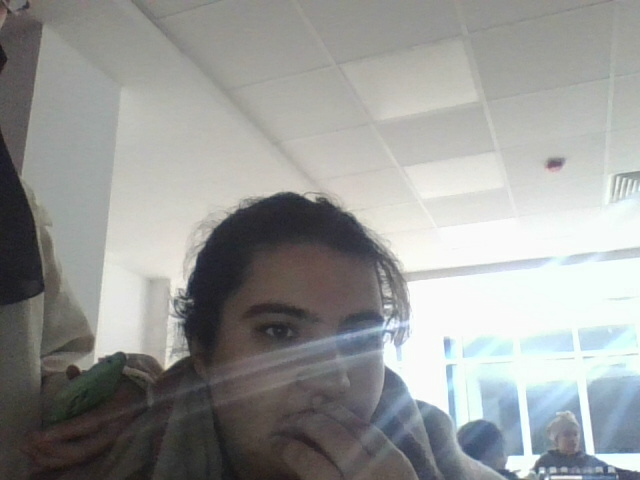

In [125]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import cv2
import numpy as np
from PIL import Image
from io import BytesIO
from google.colab.patches import cv2_imshow

def capture_image():
    js = Javascript('''
    async function captureImage() {
        const video = document.createElement('video');
        video.style.display = 'block';
        document.body.appendChild(video);

        const stream = await navigator.mediaDevices.getUserMedia({ video: true });
        video.srcObject = stream;
        await video.play();

        // Capture a frame from the webcam
        const canvas = document.createElement('canvas');
        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;
        canvas.getContext('2d').drawImage(video, 0, 0);
        stream.getTracks().forEach(track => track.stop());
        video.remove();

        return canvas.toDataURL('image/png');
    }
    captureImage();
    ''')
    display(js)
    data = eval_js("captureImage()")
    return data

# Capture an image from the webcam
image_data = capture_image()
binary_data = b64decode(image_data.split(',')[1])

# Convert the image into OpenCV format
img_array = np.array(Image.open(BytesIO(binary_data)))

# Use cv2_imshow to display the image
cv2_imshow(cv2.cvtColor(img_array, cv2.COLOR_RGB2BGR))


In [122]:
from google.colab.patches import cv2_imshow

For example, here we download and display a PNG image of the Colab logo:

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4534  100  4534    0     0  23333      0 --:--:-- --:--:-- --:--:-- 23371


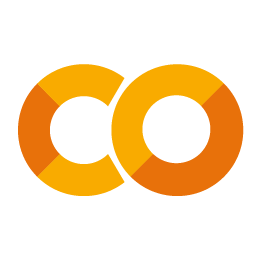

In [123]:
!curl -o logo.png https://colab.research.google.com/img/colab_favicon_256px.png
import cv2
img = cv2.imread('logo.png', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)